<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_03/03_04_exp_otras_direcciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4. Especificación de la deformación en otras direcciones



|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 15, 2022 | Conversión de código de MAXIMA a Python|

Nota: La versión original de este código no está en el main, está en este [video](https://youtu.be/2Ve9bJGPJco?t=845).

## Demostración de $\varepsilon_{x'}$

In [13]:
import sympy as sp

Especifico las variables simbólicas primero

In [14]:
x, y, AC, t = sp.symbols("x y AC theta")
ex, ey, exp = sp.symbols("varepsilon_x varepsilon_y varepsilon_x'")
# Se usa "varpesilon" en lugar de "epsilon" para una mejor notación

Se especifica la dependencia funciona $u(x,y)$ y $v(x,y)$ 

In [15]:
u = sp.Function("u")(x,y)
v = sp.Function("v")(x,y)

# Veamos cómo entiende el programa la función u:
u

u(x, y)

Se definen los diferenciales $\Delta x$ y $\Delta y$ en función de la geometría y el ángulo $\theta$ 

In [16]:
dx = AC*sp.cos(t)
dy = AC*sp.sin(t)

# Vemos cómo entiende el prgorama dx:
dx

AC*cos(theta)

Se definen las coordenadas de los puntos $A'$ y $C'$

In [17]:
# Coordenadas finales de A'
Apx = x + u  # x + u(x,y)
Apy = y + v  # y + v(x,y)

# Coordenadas finales de C' (series de Taylor truncadas de 1er orden)
Cpx = x + dx + u + sp.diff(u,x)*dx + sp.diff(u,y)*dy  
Cpy = y + dy + v + sp.diff(v,x)*dx + sp.diff(v,y)*dy

In [18]:
# Veamos la expresión para C'x
Cpx

AC*sin(theta)*Derivative(u(x, y), y) + AC*cos(theta)*Derivative(u(x, y), x) + AC*cos(theta) + x + u(x, y)

Las proyecciones de $A'C'$ en los $x$ y $y$ 

In [19]:
ApCp_x = Cpx - Apx
ApCp_y = Cpy - Apy

# En el caso de A'C' en x:
ApCp_x

AC*sin(theta)*Derivative(u(x, y), y) + AC*cos(theta)*Derivative(u(x, y), x) + AC*cos(theta)

La deformación longitudinal calulada es:

$$ \left [ (1+\varepsilon_{x'})AC  \right ]^2 = (A'C'_x)^2 + (A'C'_y)^2  $$

Pero igualada a cero:

$$ \text{eq.} =  \left [ (1+\varepsilon_{x'})AC  \right ]^2 - (A'C'_x)^2 - (A'C'_y)^2  $$


In [20]:
eq_exp = ((1+exp)*AC)**2 - ApCp_x**2 - ApCp_y**2 

# Vemos la ecuación expandida:
sp.expand(eq_exp)

AC**2*varepsilon_x'**2 + 2*AC**2*varepsilon_x' - AC**2*sin(theta)**2*Derivative(u(x, y), y)**2 - AC**2*sin(theta)**2*Derivative(v(x, y), y)**2 - 2*AC**2*sin(theta)**2*Derivative(v(x, y), y) - AC**2*sin(theta)**2 - 2*AC**2*sin(theta)*cos(theta)*Derivative(u(x, y), x)*Derivative(u(x, y), y) - 2*AC**2*sin(theta)*cos(theta)*Derivative(u(x, y), y) - 2*AC**2*sin(theta)*cos(theta)*Derivative(v(x, y), x)*Derivative(v(x, y), y) - 2*AC**2*sin(theta)*cos(theta)*Derivative(v(x, y), x) - AC**2*cos(theta)**2*Derivative(u(x, y), x)**2 - 2*AC**2*cos(theta)**2*Derivative(u(x, y), x) - AC**2*cos(theta)**2*Derivative(v(x, y), x)**2 - AC**2*cos(theta)**2 + AC**2

Observamos que el término $AC^2$ se repite en todos los términos, así que la podemos factorizar

In [21]:
sp.expand(eq_exp/(AC**2))

varepsilon_x'**2 + 2*varepsilon_x' - sin(theta)**2*Derivative(u(x, y), y)**2 - sin(theta)**2*Derivative(v(x, y), y)**2 - 2*sin(theta)**2*Derivative(v(x, y), y) - sin(theta)**2 - 2*sin(theta)*cos(theta)*Derivative(u(x, y), x)*Derivative(u(x, y), y) - 2*sin(theta)*cos(theta)*Derivative(u(x, y), y) - 2*sin(theta)*cos(theta)*Derivative(v(x, y), x)*Derivative(v(x, y), y) - 2*sin(theta)*cos(theta)*Derivative(v(x, y), x) - cos(theta)**2*Derivative(u(x, y), x)**2 - 2*cos(theta)**2*Derivative(u(x, y), x) - cos(theta)**2*Derivative(v(x, y), x)**2 - cos(theta)**2 + 1

A partir de aquí, evaluamos a mano.

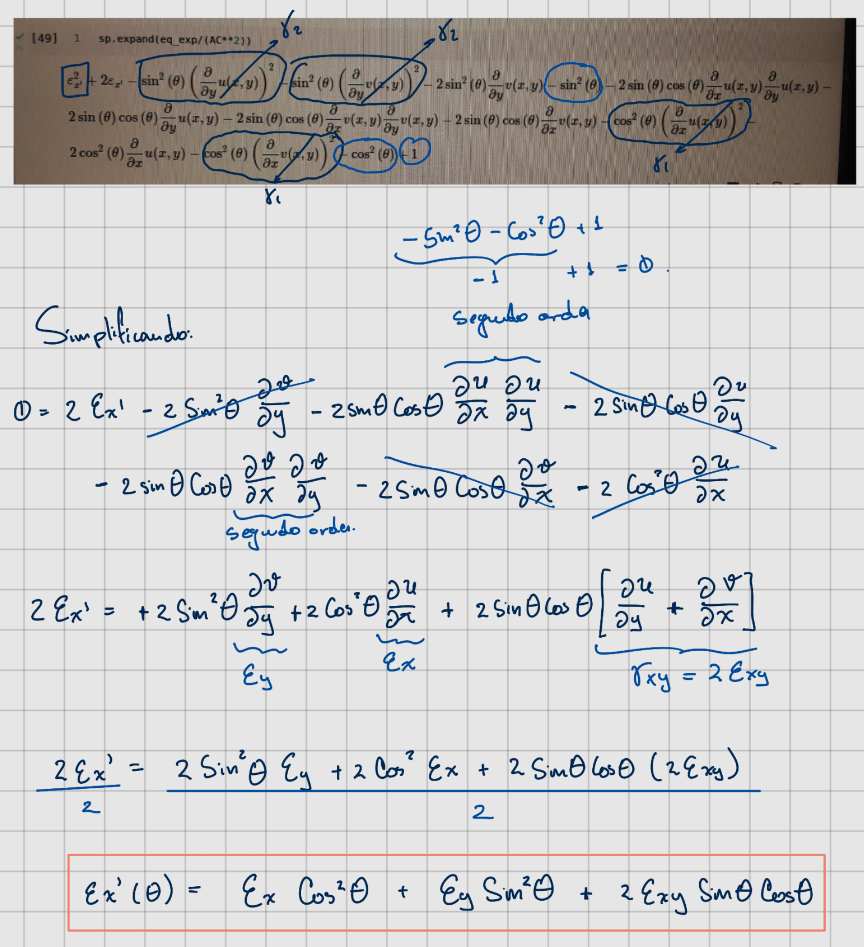

De igual forma, es posible demostrar las demás deformaciones $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$.